## Example `stata_kernel` Jupyter notebook

This Jupyter notebook is an example of how you can use Stata in the Jupyter ecosystem using `stata_kernel`.

Full documentation, including how to install, is available at https://kylebarron.dev/stata_kernel/.

## Overview

The Jupyter Notebook is a file format that permits interactive coding with text, code, and results in a single document. You can share a notebook file (with extension `.ipynb`), and results will be viewable without running the code, but as long as the recipient also has Jupyter installed, he or she can edit and re-run the code cells.

Jupyter itself is language agnostic, i.e. it permits writing code in any language. This document uses Stata code, but you can also code in Jupyter using Python, [R](https://irkernel.github.io/), [Julia](https://github.com/JuliaLang/IJulia.jl), [Matlab](https://github.com/calysto/matlab_kernel), and [SAS](https://github.com/sassoftware/sas_kernel). 

## Running code

In contrast to [IPyStata](https://github.com/TiesdeKok/ipystata), no special commands are needed. Just write code as you would normally in Stata.

Let's make sure that the connection with Stata is working properly.

In [1]:
display "Hello, world!"

Hello, world!


You can run a cell by pressing <kbd>Ctrl</kbd>+<kbd>Enter</kbd> or <kbd>Shift</kbd>+<kbd>Enter</kbd>. If a number appears in the brackets to the left of the input cell, that means that the code was successfully run (sometimes a cell doesn't produce any output).

If you don't see `Hello, world!` as output, check out the [troubleshooting tips](https://kylebarron.dev/stata_kernel/using_stata_kernel/troubleshooting/).

Let's load the included `auto` dataset.

In [2]:
sysuse auto.dta

(1978 automobile data)


Now the `auto` dataset is in memory.

### Basic descriptive statistics

Nearly all commands that work in Stata work through Jupyter as well. A couple commands that depend on the Graphical User Interface, such as `browse` and `edit`, only work on Windows.

In [3]:
set linesize 120
tabulate foreign headroom                                                                                      


           |                                     Headroom (in.)
Car origin |       1.5        2.0        2.5        3.0        3.5        4.0        4.5        5.0 |     Total
-----------+----------------------------------------------------------------------------------------+----------
  Domestic |         3         10          4          7         13         10          4          1 |        52 
   Foreign |         1          3         10          6          2          0          0          0 |        22 
-----------+----------------------------------------------------------------------------------------+----------
     Total |         4         13         14         13         15         10          4          1 |        74 


## Graphs

No special syntax is needed to generate graphs. Just write commands like you're used to.
The display order of graphs will always be the same as the order in the code.

In [4]:
set sslrelax on

Using set sslrelax on disables SSL certificate authentication.
THIS SETTING SHOULD BE USED WITH EXTREME CAUTION.

  (highschool and beyond (200 cases))

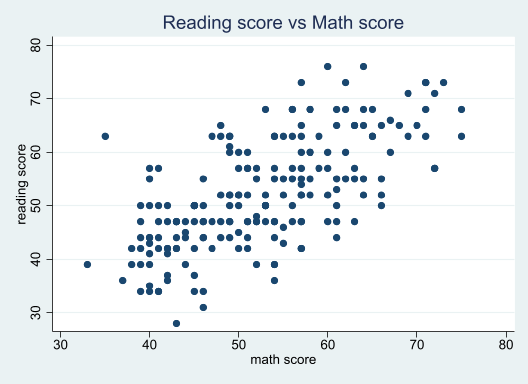

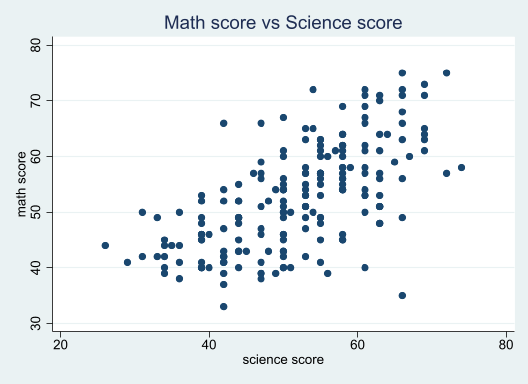

In [5]:
// Dataset with test scores
use "https://stats.idre.ucla.edu/stat/stata/notes/hsb2", clear
scatter read math, title("Reading score vs Math score")
scatter math science, title("Math score vs Science score") name(science)

If you don't want to display a graph, use the [`nodraw`](https://www.stata.com/help.cgi?nodraw_option) option...

In [6]:
scatter read math, title("Reading score vs Math score") nodraw

...or the `%quietly` magic:

In [7]:
*%quietly
scatter read math, title("Reading score vs Math score")

## Autocompletion

`nbstata` provides autocompletion for locals, globals, variables, scalars, and matrices based on the contents in memory. It also suggests file paths to load or save files. Press <kbd>Tab</kbd> while typing to activate it.

<img align="left" width="150" src="https://raw.githubusercontent.com/kylebarron/stata_kernel/master/docs/src/img/jupyterlab_autocompletion.png">

Try it below by placing the cursor between `S` and `"` and pressing <kbd>Tab</kbd>:

In [8]:
display "$S"

## Magics

[_Magics_](https://kylebarron.dev/stata_kernel/using_stata_kernel/magics/) are special commands that `stata_kernel` provides to give extra functionality, especially regarding the connection with Jupyter. 

These commands all start with `%`. You can run `%help magics` or [go here](https://kylebarron.dev/stata_kernel/using_stata_kernel/magics/) to see a list of available magics. You can also run `%magic_name --help` to see the help for any given magic.

In order to prevent confusion, these commands **must** occur at the beginning of a cell.

### `%head`, `%browse`, `%tail`

**`%head`** and **`%tail`** show a well-formatted portion of the dataset in memory.

In [9]:
*%head

,id,female,race,ses,schtyp,prog,read,write,math,science,socst
1,70,0,4,1,1,1,57,52,41,47,57
2,121,1,4,2,1,3,68,59,53,63,61
3,86,0,4,3,1,1,44,33,54,58,31
4,141,0,4,3,1,3,63,44,47,53,56
5,172,0,4,2,1,2,47,52,57,53,61


With the @finos/perspective-jupyterlab extension [installed](https://perspective.finos.org/docs/python/#jupyterlab), **`%browse`** opens an interactive Datagrid widget.

In [10]:
%browse if female

PerspectiveWidget(columns=['index', 'id', 'female', 'race', 'ses', 'schtyp', 'prog', 'read', 'write', 'math', …

### `%help`
**`%help`** shows the help menu for a given command. The links in this help file are clickable, just like the official Stata documentation. (This command requires internet access.)

In [11]:
%help order

© Copyright 1996–2023 StataCorp LLC • Terms of use • Privacy • Contact us


### `%locals`

**`%locals`** displays the local macros in the current environment. (The stata command `macro list` does the same for global macros.)

In [12]:
local local1 "foo"
local local2 "bar"
local abcd "foo bar"

In [13]:
%locals

abcd:           foo bar
local2:         bar
local1:         foo


In [14]:
macro list

T_gm_fix_span:  0
S_level:        95
F1:             help advice;
F2:             describe;
F7:             save
F8:             use
S_ADO:          BASE;SITE;.;PERSONAL;PLUS;OLDPLACE
S_StataMP:      MP
S_StataSE:      SE
S_CONSOLE:      console
S_OS:           Windows
S_OSDTL:        64-bit
S_MACH:         PC (64-bit x86-64)
_abcd:          foo bar
_local2:        bar
_local1:        foo
S_FN:           https://stats.idre.ucla.edu/stat/stata/notes/hsb2.dta
S_FNDATE:       17 Jun 2002 08:48


## `;`-delimited commands

Often with long commands, such as graphs, using [`#delimit ;`](https://www.stata.com/help.cgi?delimit) helps prevent very long lines and helps to keep code more readable. This is supported in `stata_kernel`, despite it not being allowed in the normal Stata command-line environment.

In [15]:
sysuse auto, clear

(1978 automobile data)


In [16]:
#delimit ;
display "Hello, world!";

Hello, world!


It's important to note that the `;`-delimiter mode persists across cells. `stata_kernel` will expect cells to include `;` for each command, and will raise a warning if `;` is missing.

In [17]:
display "Hello, world!"

Hello, world!


You can check the current delimiter with the **`%delimit`** magic.

In [18]:
*%delimit

The delimiter is currently: ;


You can switch back to normal line-break delimited commands (i.e. where `;` is unnecessary) with `#delimit cr`.

In [19]:
#delimit cr

In [20]:
*%delimit

The delimiter is currently: cr


## Comments in code

`stata_kernel` lets you use _any_ format of comments, including `//`, `///`, `*`, and `/*`-`*/`, even in an interactive console environment where the Stata command line normally wouldn't accept them.

In [21]:
display "displayed"
// display "comment"

displayed


In [22]:
display "line continuation " /// commented out
    "comment"

line continuation comment


In [23]:
* display "not displayed"

In [24]:
display "displayed1"
/*
display "displayed2"
*/
display "displayed3"

displayed1
displayed3
